<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/supervised/03_classification/08_classification_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

###Metryki - klasyfikacja binarna

Accuracy - Dokładność klasyfikacji

In [0]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8

In [64]:
df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
df

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [65]:
results = df.sort_values(by='y_true')
results.reset_index(drop=True, inplace=True)
results['sample'] = results.index + 1

results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,1,10


In [66]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=800, height=600, title='Klasyfikator binarny')
fig.show()

###Macierz konfuzji/pomyłek

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm


array([[ 8,  2],
       [ 4, 16]])

In [68]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa4063e0710>)

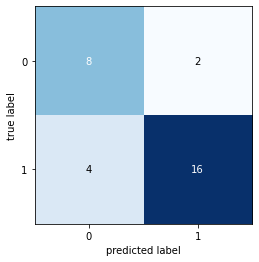

In [69]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)


In [70]:
cm_df = pd.DataFrame(cm, columns=['y_true', 'y_pred'], index=['y_true', 'y_pred'])
cm_df

,y_true,y_pred
y_true,8,2
y_pred,4,16


In [71]:
cm.ravel()

array([ 8,  2,  4, 16])

In [72]:
tn, fp, fn, tp = cm.ravel()

print(f'TN - true negative: {tn}')
print(f'FN - false nagative: {fn}')
print(f'fN - false positive: {fn}')
print(f'TP - true positive: {tp}')

TN - true negative: 8
FN - false nagative: 4
fN - false positive: 4
TP - true positive: 16


In [73]:
#False Positve Rate  - Type I error

fpr = fp / (fp + tn)
fpr

0.2

In [74]:
#False Negative Rate - Type II error

fnr = fn / (fn + tp)
fnr

0.2

In [75]:
#Precision - ile obserwacji przewidzianych jako prawdziwie pozytywne są w rzeczywistości pozytywne

precision = tp /(tp + fp)
precision

0.8888888888888888

In [76]:
#Recall - ile obserwacji ze wszystkich pozytywnych sklasyfikowaliśmy jako prawdziwie pozytywne

recall = tp / (tp + fn)
recall

0.8

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.89      0.80      0.84        20

    accuracy                           0.80        30
   macro avg       0.78      0.80      0.78        30
weighted avg       0.81      0.80      0.80        30



###Krzywa ROC

In [78]:
from sklearn.metrics import roc_curve

fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc




,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [79]:
def plot_roc_curve(y_true, y_pred):
    # Binary classification
    from sklearn.metrics import roc_curve
    fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

    fig = go.Figure(
        data=[
            go.Scatter(x=roc['fpr'], y=roc['tpr'],
                    line_color='red',
                    name='ROC Curve'),
            go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines', 
                    line_dash='dash', 
                    line_color='navy')
        ],
        layout=go.Layout(xaxis_title='False Positive Rate',
                         yaxis_title='True Positive Rate',
                         title='ROC Curve',
                         showlegend=False,
                         width=700))
    fig.show()

plot_roc_curve(y_true, y_pred)

###Metryki - klasyfikacja wieloklasowa

Accuracy - dokładność klasyfikacji

In [80]:
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2])

from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.7241379310344828

In [81]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 6,  1,  0],
       [ 3, 10,  2],
       [ 0,  2,  5]])

In [82]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_2', 'true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['label_1', 'label_2', 'label_3']))

              precision    recall  f1-score   support

     label_1       0.67      0.86      0.75         7
     label_2       0.77      0.67      0.71        15
     label_3       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29

